In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

%matplotlib inline

In [33]:
income = pd.read_csv('income_cleaned.csv')

<h1>3. Data Preprocessing</h1>

<h2>3.1. One-Hot Encoding of Categorical Variables</h2>

In [3]:
one_hot_columns = ['workclass', 'education', 'marital-status','occupation', 'relationship', 'race', 'gender',
                   'hours-per-week']

one_hot_data = income[one_hot_columns].copy()
one_hot_data = pd.get_dummies(one_hot_data)
income_cleaned = one_hot_data.merge(income, left_index=True, right_index=True)

In [4]:
income_cleaned = income_cleaned.drop(['workclass', 'education', 'marital-status','occupation', 'relationship', 'race',
                                      'gender'], axis=1)

<h2>3.2. Normalization and Standardization</h2>

In [5]:
X = income_cleaned.drop(columns = ['Income_Above_or_Below_50K'])
y = income_cleaned.Income_Above_or_Below_50K

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.25)

In [6]:
# Normalization
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  

# Fitting on test data
X_test = scaler.transform(X_test)

<h1>4. Data Modeling</h1>

<h2>4.1 Logistic Regression</h2>

In [8]:
from sklearn.linear_model import LogisticRegression

# Fit the model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [9]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      8515
           1       0.68      0.55      0.61      2791

    accuracy                           0.82     11306
   macro avg       0.77      0.73      0.75     11306
weighted avg       0.82      0.82      0.82     11306



Text(33.0, 0.5, 'Actual classes')

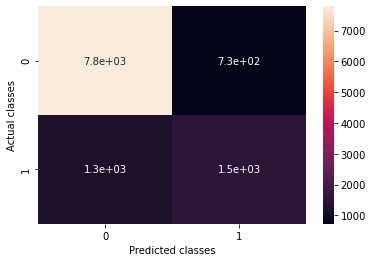

In [10]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

The confusion matrix is shown as an array and is 2x2 because it is a binary classification.

In [11]:
from sklearn.metrics import accuracy_score

print('Logistic Regression accuracy: {0:0.4f}'. format(accuracy_score(y_test,predictions )))

Logistic Regression accuracy: 0.8239


<h2>4.2. K Nearest Neighbors</h2>

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

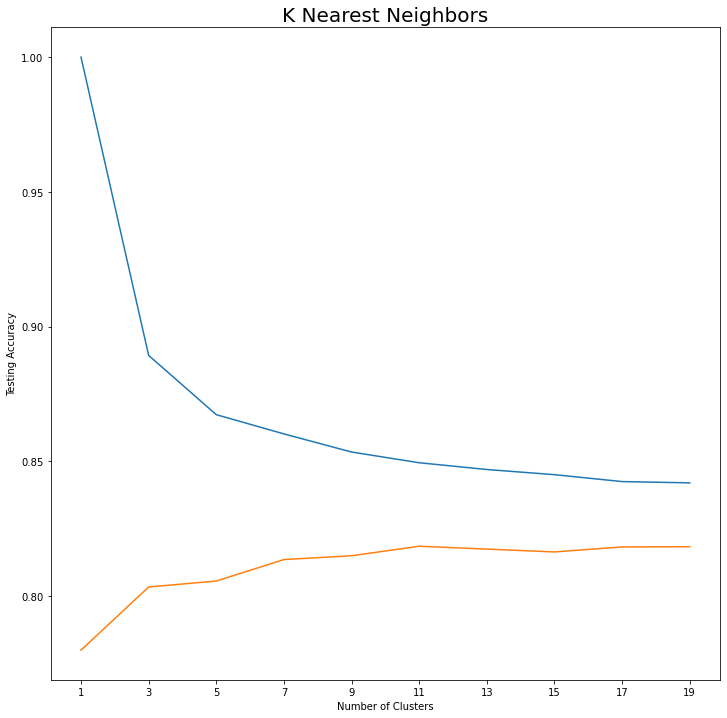

In [23]:
plt.figure(figsize = (12, 12))    
plt.plot(range(1, 20, 2), train_scores)
plt.plot(range(1, 20, 2), test_scores)
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.title("K Nearest Neighbors", fontsize = 20)
plt.xlabel("Number of Clusters")
plt.ylabel("Testing Accuracy")
plt.show()

The classifier stabilizes at around a 'k' value of 7.

In [24]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))

k=7 Test Acc: 0.814


<h2>4.3 Decision Tree</h2>

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Fit decision tree with default hyperparameters
tree_default = DecisionTreeClassifier(max_depth=5)
tree_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [27]:
y_default = tree_default.predict(X_test)
print(classification_report(y_test,y_default))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      8515
           1       0.64      0.57      0.60      2791

    accuracy                           0.81     11306
   macro avg       0.75      0.73      0.74     11306
weighted avg       0.81      0.81      0.81     11306



<h2>4.4. Comparing the Models</h2>

In [28]:
classifiers = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier()]
classifier_names = ["LogisticRegression", "K Nearest Neighbors", "Decision Tree Classifier"]
accuracies = []

In [29]:
from sklearn.metrics import f1_score

for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

LogisticRegression:
F1 score: 0.61
K Nearest Neighbors:
F1 score: 0.59
Decision Tree Classifier:
F1 score: 0.53


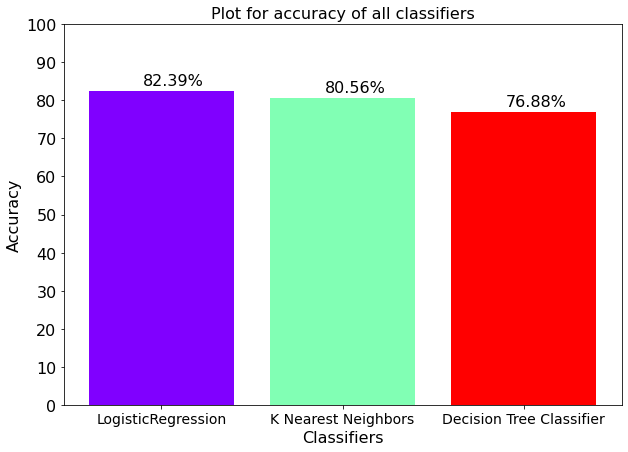

In [30]:
from matplotlib.cm import rainbow

plt.figure(figsize = (10, 7))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

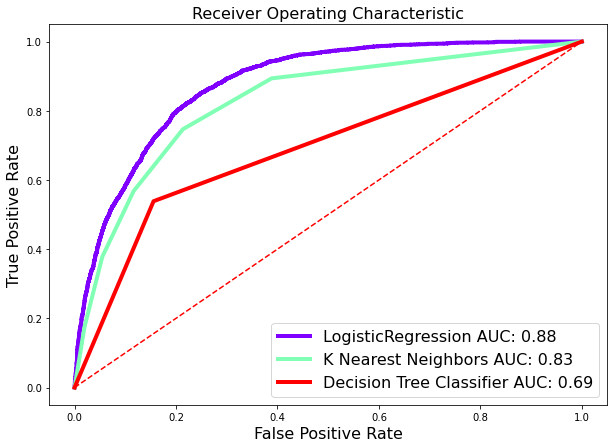

In [31]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (10, 7))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

The model with the lowest area under the curve is Decision Tree, at 0.69. The model with the highest area under the curve is Logistic Regression, at 0.88.

In [34]:
best_feat = np.abs(income_cleaned.corr()['Income_Above_or_Below_50K'])
best_feat_corr = pd.DataFrame(best_feat[:-1]).sort_values('Income_Above_or_Below_50K',ascending=False)
best_feat_corr

,Income_Above_or_Below_50K
marital-status_Married-civ-spouse,0.446192
relationship_Husband,0.403706
educational-num,0.332800
marital-status_Never-married,0.319536
age,0.237040
...,...
workclass_Without-pay,0.007618
education_Assoc-acdm,0.006991
Unnamed: 0,0.005745
education_Assoc-voc,0.004648


Text(0, 0.5, 'Features')

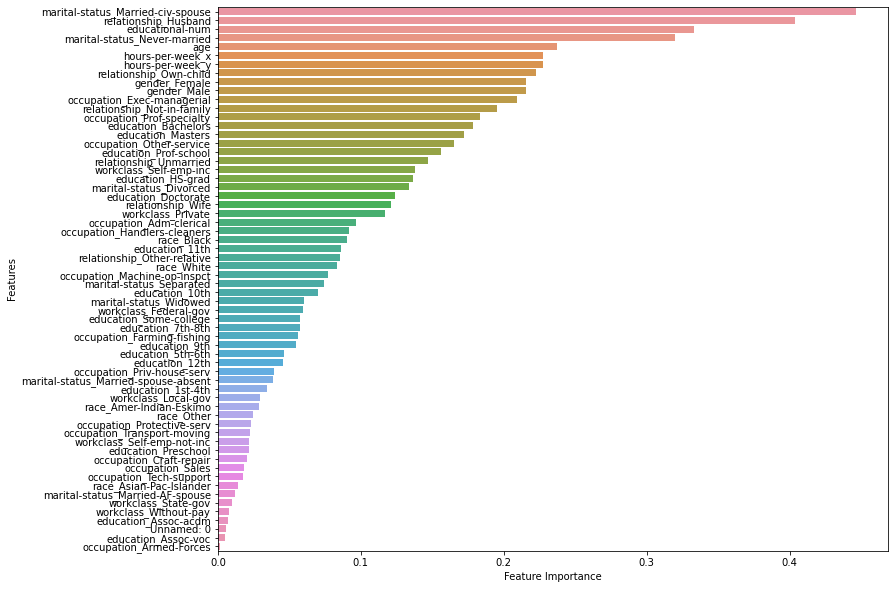

In [35]:
plt.figure(figsize=(12,10))
sns.barplot(x=best_feat_corr['Income_Above_or_Below_50K'], y=best_feat_corr.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')

The most important factors include being married in a civil procedure, being a husband, education, and never being married. The highest importance value, civil marriage, is 0.446, so the importance of each individual factor is not that strong.